# EDA

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [82]:
df = pd.read_csv('Dataset/Train.csv')
df1 = pd.read_csv('Dataset/Test.csv')
df.head()


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555
1,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928


In [83]:
df1.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,297.65,0.0,0,1,Clear skies,Clear skies,01/07/14 0:00,01/07/14,NaN
1,NaN,297.45,0.0,0,1,Clear skies,Clear skies,01/07/14 1:00,01/07/14,NaN
2,NaN,296.75,0.0,0,1,Rainfall,Soft rain,01/07/14 2:00,01/07/14,NaN
3,NaN,296.42,0.0,0,1,Rainfall,Steady rain,01/07/14 3:00,01/07/14,NaN
4,NaN,295.56,0.0,0,40,Rainfall,Soft rain,01/07/14 4:00,01/07/14,NaN


In [84]:
df['Holiday'].value_counts()


Holiday
1.0    50
Name: count, dtype: int64

In [85]:
df1['Holiday'].value_counts()

Holiday
1.0    3
Name: count, dtype: int64

In [86]:
df['Holiday'] = df['Holiday'].fillna(0)
df['Holiday'].value_counts()


Holiday
0.0    38323
1.0       50
Name: count, dtype: int64

In [87]:
df1['Holiday'] = df1['Holiday'].fillna(0)
df1['Holiday'].value_counts()


Holiday
0.0    2205
1.0       3
Name: count, dtype: int64

In [88]:
weather_encoder = LabelEncoder()
weather_desc_encoder = LabelEncoder()

In [89]:
weather_encoder1 = LabelEncoder()
weather_desc_encoder1 = LabelEncoder()

In [90]:
df['Weather_Encoded'] = weather_encoder.fit_transform(df['Weather'])

In [91]:
df1['Weather_Encoded'] = weather_encoder.fit_transform(df1['Weather'])

In [92]:
df['Weather_Desc_Encoded'] = weather_encoder.fit_transform(df['Weather_Desc'])


In [93]:
df1['Weather_Desc_Encoded'] = weather_encoder.fit_transform(df1['Weather_Desc'])

In [94]:
df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Weather_Encoded,Weather_Desc_Encoded
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555,3,19
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525,3,9
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772,3,10
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031,3,10
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928,3,9


In [95]:
df1.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Weather_Encoded,Weather_Desc_Encoded
0,0.0,297.65,0.0,0,1,Clear skies,Clear skies,01/07/14 0:00,01/07/14,NaN,2,2
1,0.0,297.45,0.0,0,1,Clear skies,Clear skies,01/07/14 1:00,01/07/14,NaN,2,2
2,0.0,296.75,0.0,0,1,Rainfall,Soft rain,01/07/14 2:00,01/07/14,NaN,7,16
3,0.0,296.42,0.0,0,1,Rainfall,Steady rain,01/07/14 3:00,01/07/14,NaN,7,17
4,0.0,295.56,0.0,0,40,Rainfall,Soft rain,01/07/14 4:00,01/07/14,NaN,7,16


In [96]:
df.drop(['Weather_Desc'], axis=1, inplace=True)

In [97]:
df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,TimeStamp,Date,Traffic_Vol,Weather_Encoded,Weather_Desc_Encoded
0,0.0,289.28,0.0,0.0,40,Cloudy skies,02/10/08 9:00,02/10/08,5555,3,19
1,0.0,290.26,0.0,0.0,75,Cloudy skies,02/10/08 10:00,02/10/08,4525,3,9
2,0.0,290.28,0.0,0.0,90,Cloudy skies,02/10/08 11:00,02/10/08,4772,3,10
3,0.0,290.33,0.0,0.0,90,Cloudy skies,02/10/08 12:00,02/10/08,5031,3,10
4,0.0,292.14,0.0,0.0,75,Cloudy skies,02/10/08 13:00,02/10/08,4928,3,9


In [98]:
df1.drop(['Weather'], axis=1, inplace=True)

In [99]:
df1.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather_Desc,TimeStamp,Date,Traffic_Vol,Weather_Encoded,Weather_Desc_Encoded
0,0.0,297.65,0.0,0,1,Clear skies,01/07/14 0:00,01/07/14,NaN,2,2
1,0.0,297.45,0.0,0,1,Clear skies,01/07/14 1:00,01/07/14,NaN,2,2
2,0.0,296.75,0.0,0,1,Soft rain,01/07/14 2:00,01/07/14,NaN,7,16
3,0.0,296.42,0.0,0,1,Steady rain,01/07/14 3:00,01/07/14,NaN,7,17
4,0.0,295.56,0.0,0,40,Soft rain,01/07/14 4:00,01/07/14,NaN,7,16


In [100]:
df["Rainfall_last_hour"].value_counts()

Rainfall_last_hour
0.000000     36720
0.250000       223
0.510000        78
0.300000        41
0.307143        31
             ...  
9.448571         1
13.460000        1
10.727143        1
6.004286         1
1.414286         1
Name: count, Length: 604, dtype: int64

In [101]:
df1["Rainfall_last_hour"].value_counts()

Rainfall_last_hour
0.000000    1807
0.250000     101
1.780000      19
1.020000      12
0.350000      12
            ... 
3.002857       1
1.034286       1
2.347143       1
4.754286       1
0.660000       1
Name: count, Length: 144, dtype: int64

In [102]:
df.isna().sum()

Holiday                 0
Temperature             0
Rainfall_last_hour      0
Snowfall_last_hour      0
Cloud_Cover             0
Weather                 0
TimeStamp               0
Date                    0
Traffic_Vol             0
Weather_Encoded         0
Weather_Desc_Encoded    0
dtype: int64

In [103]:
df1.isna().sum()

Holiday                    0
Temperature                0
Rainfall_last_hour         0
Snowfall_last_hour         0
Cloud_Cover                0
Weather_Desc               0
TimeStamp                  0
Date                       0
Traffic_Vol             2208
Weather_Encoded            0
Weather_Desc_Encoded       0
dtype: int64

In [104]:
correlation_matrix = df.corr(numeric_only=True)

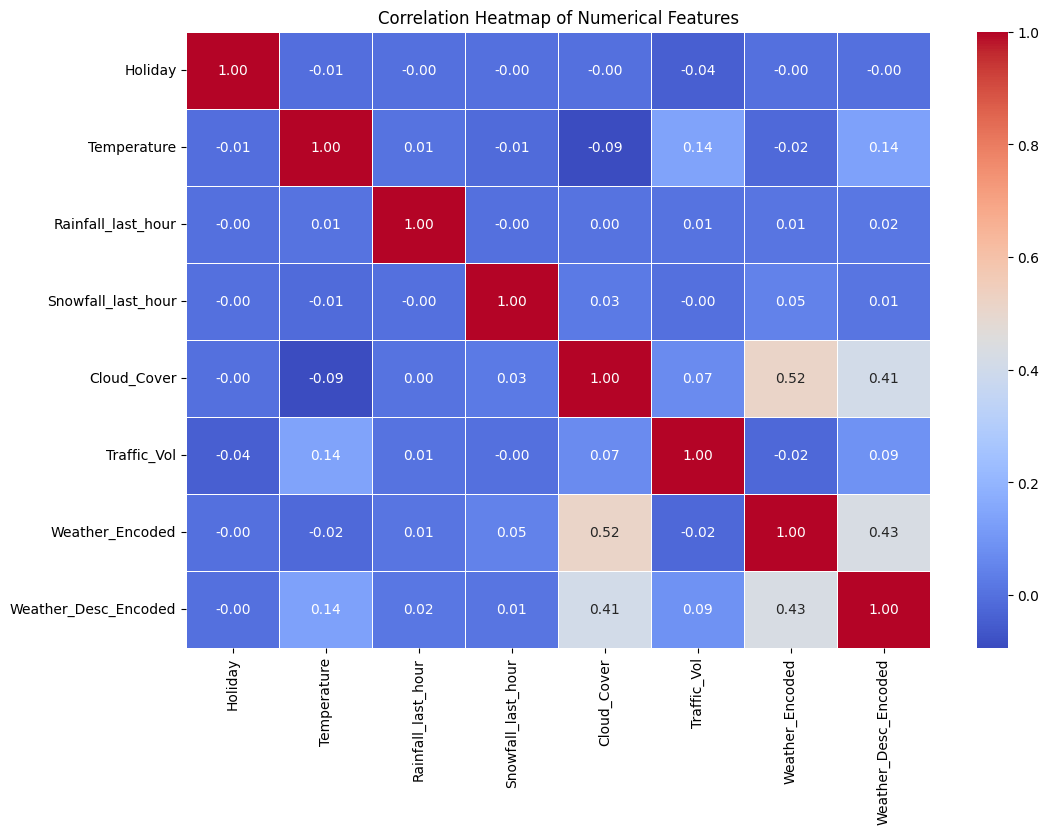

In [105]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [106]:
df['TimeStamp_Hour'] = df['TimeStamp'].str.extract(r'(\d+):')[0].astype(int)
df['TimeStamp_Minute'] = df['TimeStamp'].str.extract(r':(\d+)')[0].astype(int)
df['Is_AM'] = (df['TimeStamp_Hour'] < 12).astype(int)
df.head()
    

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,TimeStamp,Date,Traffic_Vol,Weather_Encoded,Weather_Desc_Encoded,TimeStamp_Hour,TimeStamp_Minute,Is_AM
0,0.0,289.28,0.0,0.0,40,Cloudy skies,02/10/08 9:00,02/10/08,5555,3,19,9,0,1
1,0.0,290.26,0.0,0.0,75,Cloudy skies,02/10/08 10:00,02/10/08,4525,3,9,10,0,1
2,0.0,290.28,0.0,0.0,90,Cloudy skies,02/10/08 11:00,02/10/08,4772,3,10,11,0,1
3,0.0,290.33,0.0,0.0,90,Cloudy skies,02/10/08 12:00,02/10/08,5031,3,10,12,0,0
4,0.0,292.14,0.0,0.0,75,Cloudy skies,02/10/08 13:00,02/10/08,4928,3,9,13,0,0


In [107]:
df1['TimeStamp_Hour'] = df1['TimeStamp'].str.extract(r'(\d+):')[0].astype(int)
df1['TimeStamp_Minute'] = df1['TimeStamp'].str.extract(r':(\d+)')[0].astype(int)
df1['Is_AM'] = (df1['TimeStamp_Hour'] < 12).astype(int)
df1.head()
    

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather_Desc,TimeStamp,Date,Traffic_Vol,Weather_Encoded,Weather_Desc_Encoded,TimeStamp_Hour,TimeStamp_Minute,Is_AM
0,0.0,297.65,0.0,0,1,Clear skies,01/07/14 0:00,01/07/14,NaN,2,2,0,0,1
1,0.0,297.45,0.0,0,1,Clear skies,01/07/14 1:00,01/07/14,NaN,2,2,1,0,1
2,0.0,296.75,0.0,0,1,Soft rain,01/07/14 2:00,01/07/14,NaN,7,16,2,0,1
3,0.0,296.42,0.0,0,1,Steady rain,01/07/14 3:00,01/07/14,NaN,7,17,3,0,1
4,0.0,295.56,0.0,0,40,Soft rain,01/07/14 4:00,01/07/14,NaN,7,16,4,0,1


In [108]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')


In [109]:
df1['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

In [110]:
df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,TimeStamp,Date,Traffic_Vol,Weather_Encoded,Weather_Desc_Encoded,TimeStamp_Hour,TimeStamp_Minute,Is_AM
0,0.0,289.28,0.0,0.0,40,Cloudy skies,02/10/08 9:00,2008-10-02,5555,3,19,9,0,1
1,0.0,290.26,0.0,0.0,75,Cloudy skies,02/10/08 10:00,2008-10-02,4525,3,9,10,0,1
2,0.0,290.28,0.0,0.0,90,Cloudy skies,02/10/08 11:00,2008-10-02,4772,3,10,11,0,1
3,0.0,290.33,0.0,0.0,90,Cloudy skies,02/10/08 12:00,2008-10-02,5031,3,10,12,0,0
4,0.0,292.14,0.0,0.0,75,Cloudy skies,02/10/08 13:00,2008-10-02,4928,3,9,13,0,0


In [111]:
df.drop(['TimeStamp'], axis=1, inplace=True)
df1.drop(['TimeStamp'], axis=1, inplace=True)

In [112]:
df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Date,Traffic_Vol,Weather_Encoded,Weather_Desc_Encoded,TimeStamp_Hour,TimeStamp_Minute,Is_AM
0,0.0,289.28,0.0,0.0,40,Cloudy skies,2008-10-02,5555,3,19,9,0,1
1,0.0,290.26,0.0,0.0,75,Cloudy skies,2008-10-02,4525,3,9,10,0,1
2,0.0,290.28,0.0,0.0,90,Cloudy skies,2008-10-02,4772,3,10,11,0,1
3,0.0,290.33,0.0,0.0,90,Cloudy skies,2008-10-02,5031,3,10,12,0,0
4,0.0,292.14,0.0,0.0,75,Cloudy skies,2008-10-02,4928,3,9,13,0,0


In [113]:
df1.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather_Desc,Date,Traffic_Vol,Weather_Encoded,Weather_Desc_Encoded,TimeStamp_Hour,TimeStamp_Minute,Is_AM
0,0.0,297.65,0.0,0,1,Clear skies,2008-10-02,NaN,2,2,0,0,1
1,0.0,297.45,0.0,0,1,Clear skies,2008-10-02,NaN,2,2,1,0,1
2,0.0,296.75,0.0,0,1,Soft rain,2008-10-02,NaN,7,16,2,0,1
3,0.0,296.42,0.0,0,1,Steady rain,2008-10-02,NaN,7,17,3,0,1
4,0.0,295.56,0.0,0,40,Soft rain,2008-10-02,NaN,7,16,4,0,1


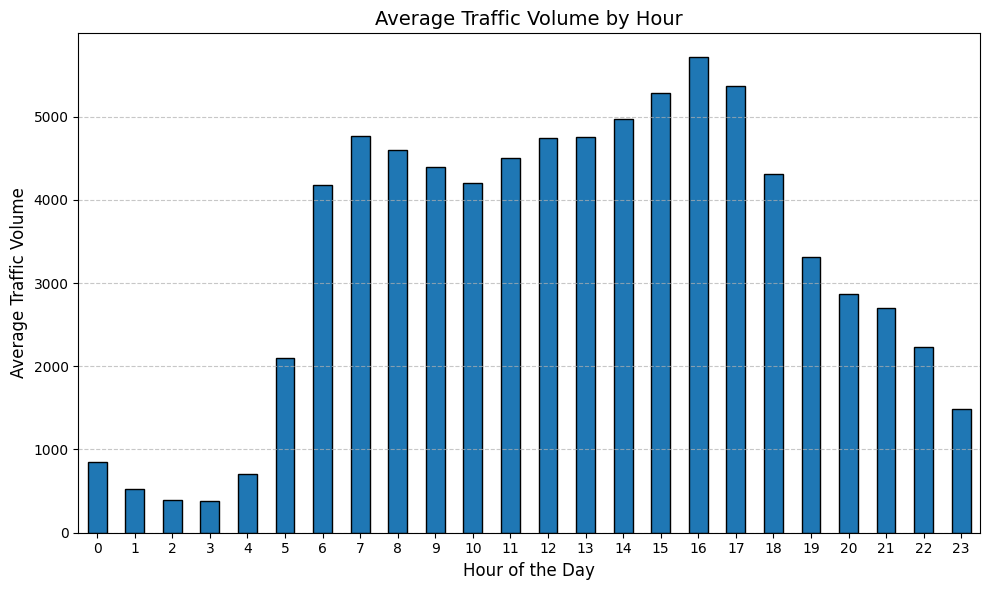

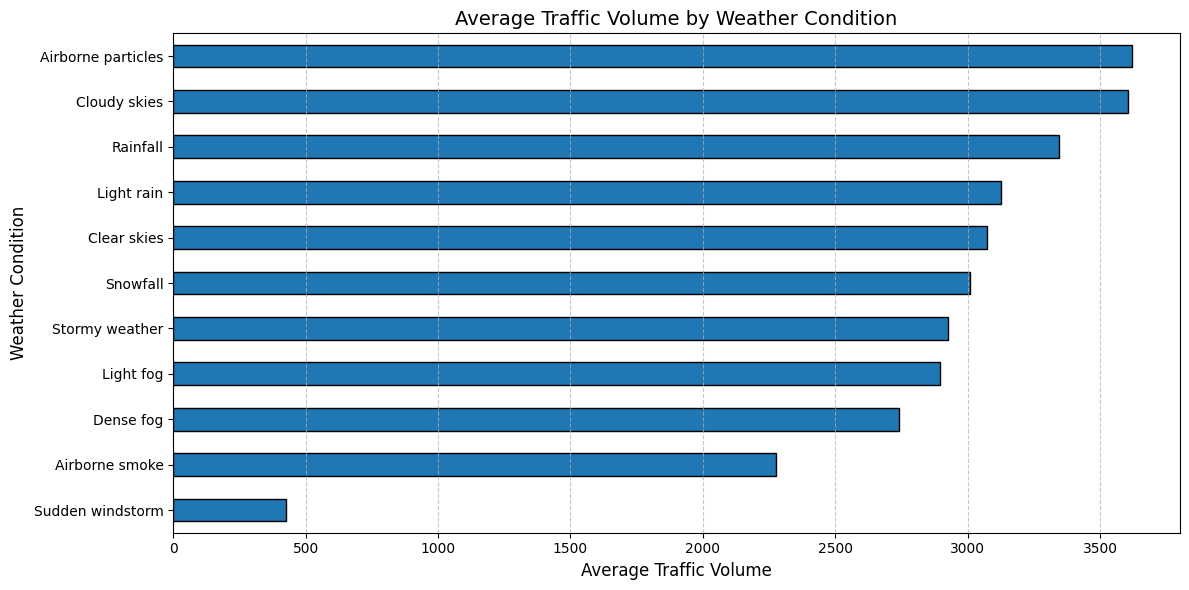

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.groupby('TimeStamp_Hour')['Traffic_Vol'].mean().plot(kind='bar', edgecolor='black')
plt.title('Average Traffic Volume by Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Traffic Volume', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
df.groupby('Weather')['Traffic_Vol'].mean().sort_values().plot(kind='barh', edgecolor='black')
plt.title('Average Traffic Volume by Weather Condition', fontsize=14)
plt.xlabel('Average Traffic Volume', fontsize=12)
plt.ylabel('Weather Condition', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


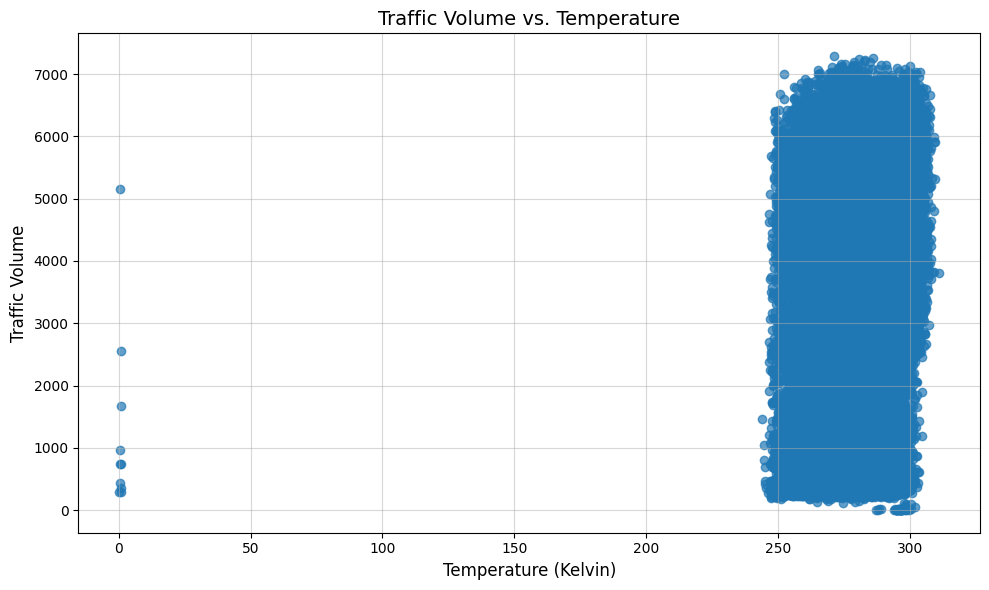

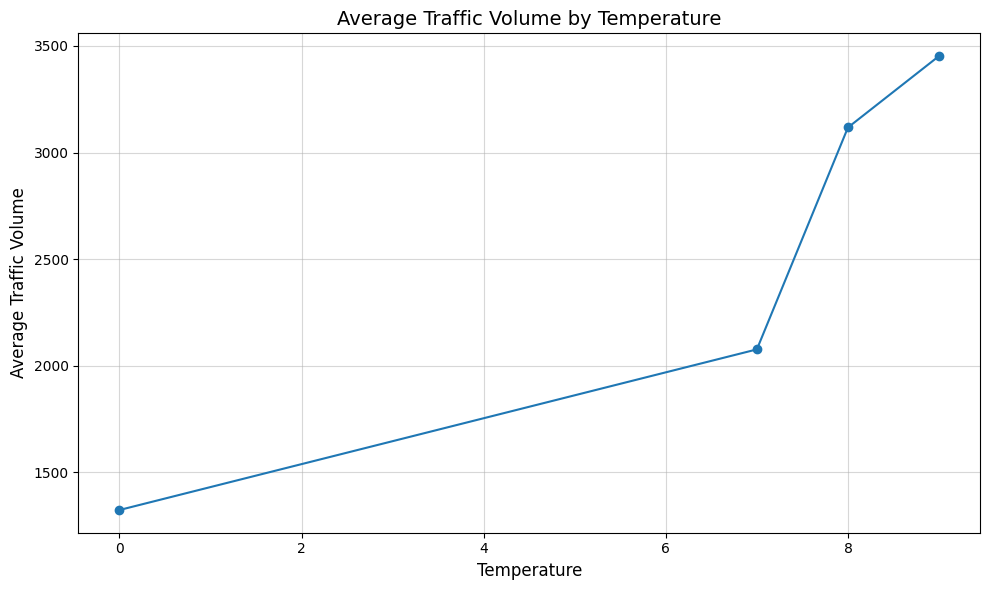

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Traffic_Vol'], alpha=0.7)
plt.title('Traffic Volume vs. Temperature', fontsize=14)
plt.xlabel('Temperature (Kelvin)', fontsize=12)
plt.ylabel('Traffic Volume', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


df['Temperature_Bin'] = pd.cut(df['Temperature'], bins=10, labels=False)


temp_traffic = df.groupby('Temperature_Bin')['Traffic_Vol'].mean()

plt.figure(figsize=(10, 6))
temp_traffic.plot(kind='line', marker='o')
plt.title('Average Traffic Volume by Temperature Clusters', fontsize=14)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Average Traffic Volume Clusters', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


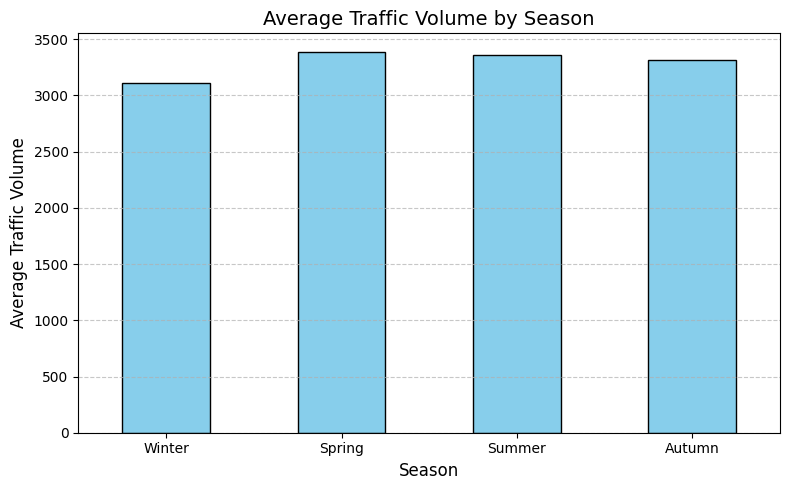

In [120]:
# Define a mapping for seasons
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

# Map directly from the month
df['Season'] = df['Date'].dt.month.map(month_to_season)



season_traffic = df.groupby('Season')['Traffic_Vol'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

plt.figure(figsize=(8, 5))
season_traffic.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Traffic Volume by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Traffic Volume', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
